# TP Challenge

Replace your_name  by your name 

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

## Importing Librairies

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Preprocessing

- Check if missing values

- Check if duplicates (if yes, delete duplicated rows)

In [35]:
# import data
df = pd.read_csv('./data/train.csv')
df.head()

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# check missing values
df.isnull().sum().sort_values(ascending=False)

Id     0
V56    0
V64    0
V63    0
V62    0
      ..
V28    0
V27    0
V26    0
V25    0
Buy    0
Length: 87, dtype: int64

In [37]:
# check duplicates (column id excluded because it is supposed to be unique)
print(df.duplicated(subset=df.columns[1:]).sum())
# remove the 304 duplicated rows
df.drop_duplicates(subset=df.columns[1:], inplace=True)

304


## Visualization 

- Check if you have outliers in each feature (columns) using seaborn or matplotlib
- Check the correlation between each column [seaborn can maybe help you...](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- Plot the distribution of the target


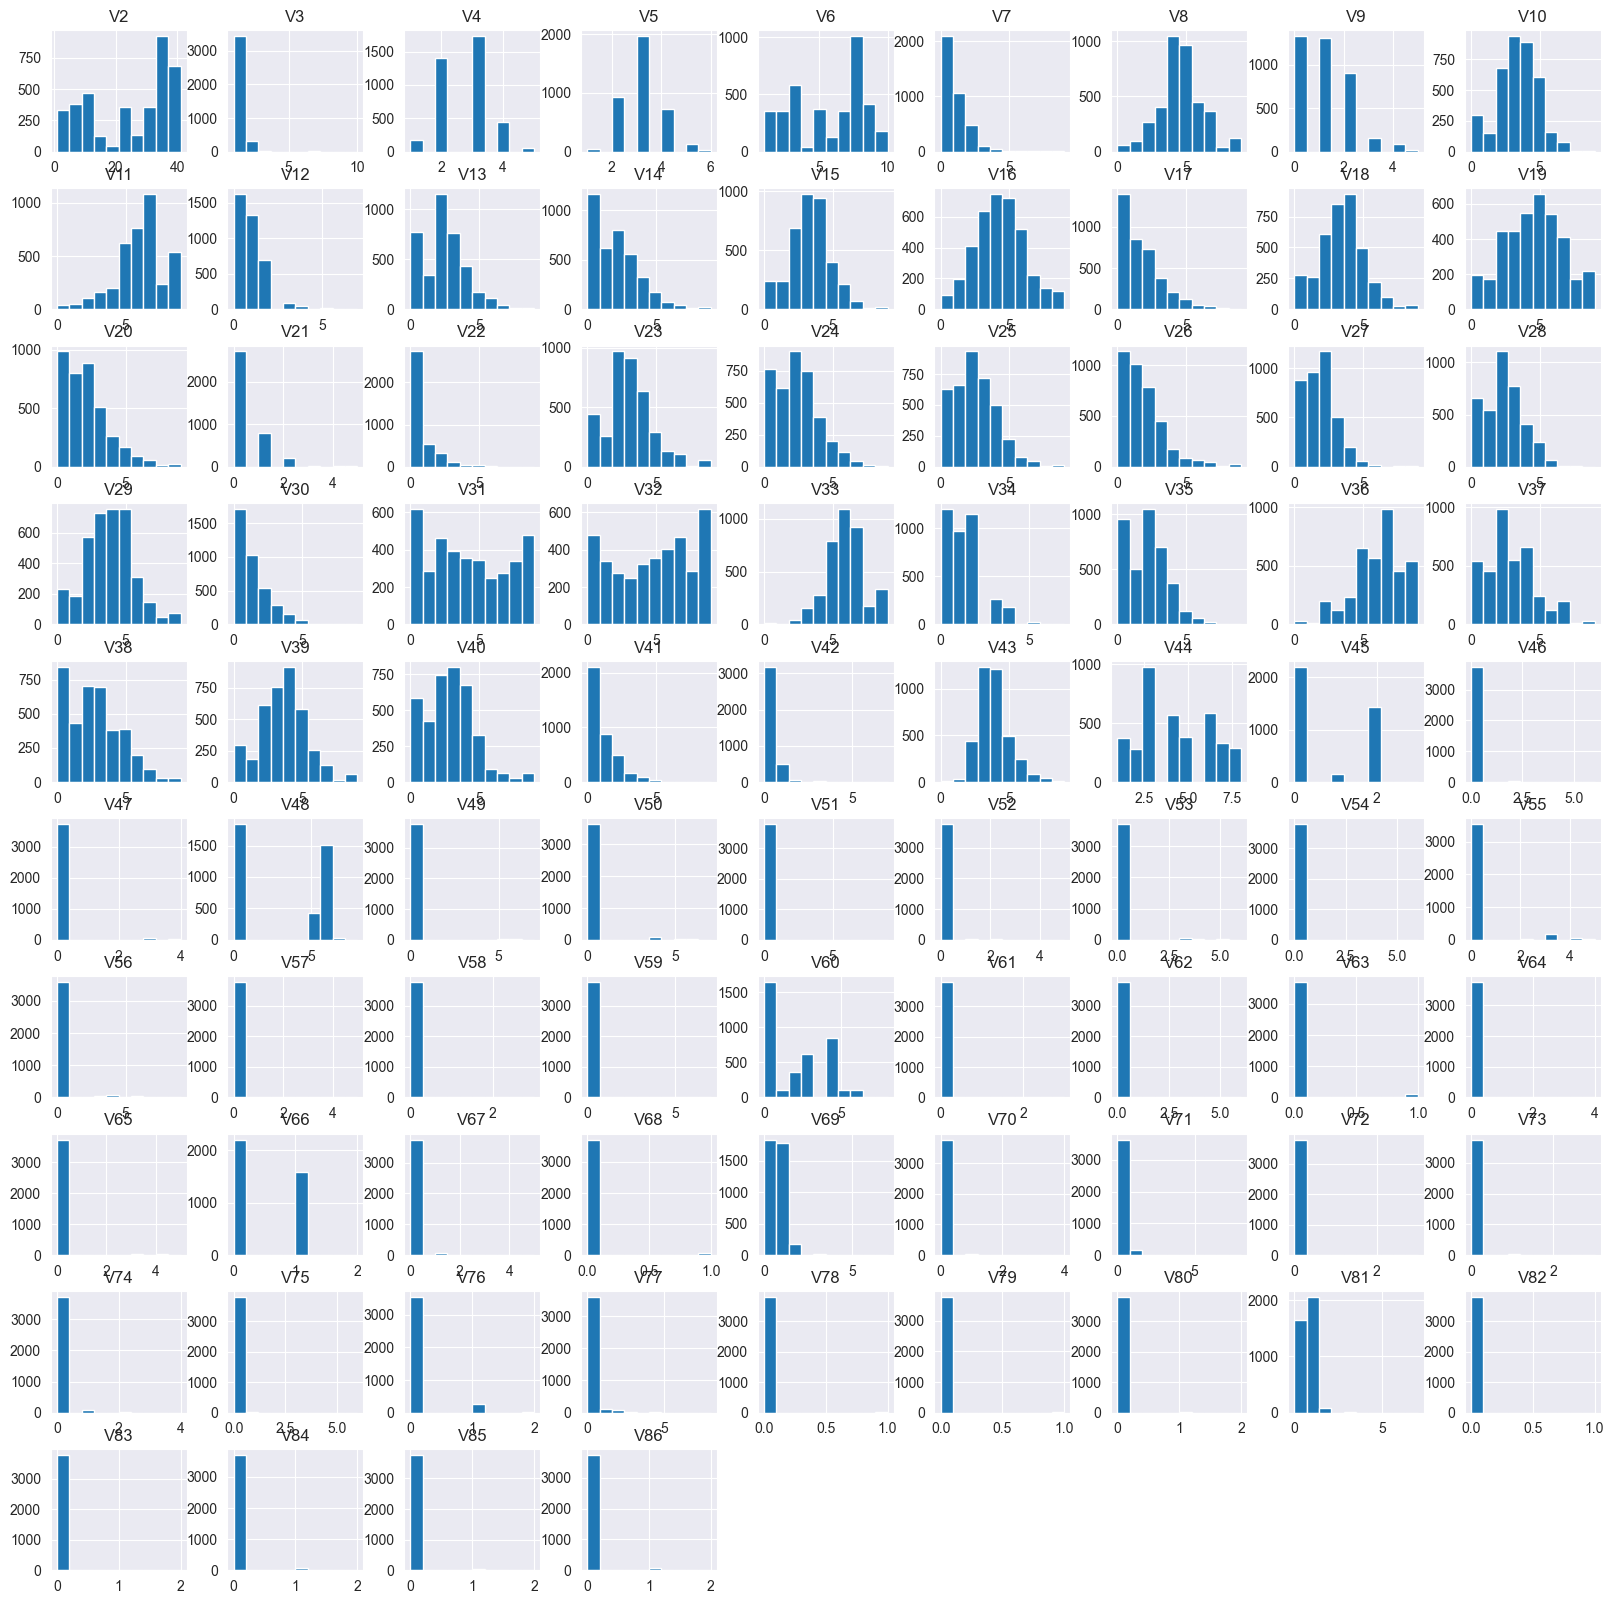

In [38]:
# display the values of each column in a chart (excluding the id and buy columns)
df.drop(columns=['Id', 'Buy']).hist(figsize=(20, 20))
plt.show()
# it looks like there are a few outliers here and there in V12, V34, V45, V48, V50, V53, V55, V56, V63, V67, V68, V69, V71, V74, V76, V77, V81, V84

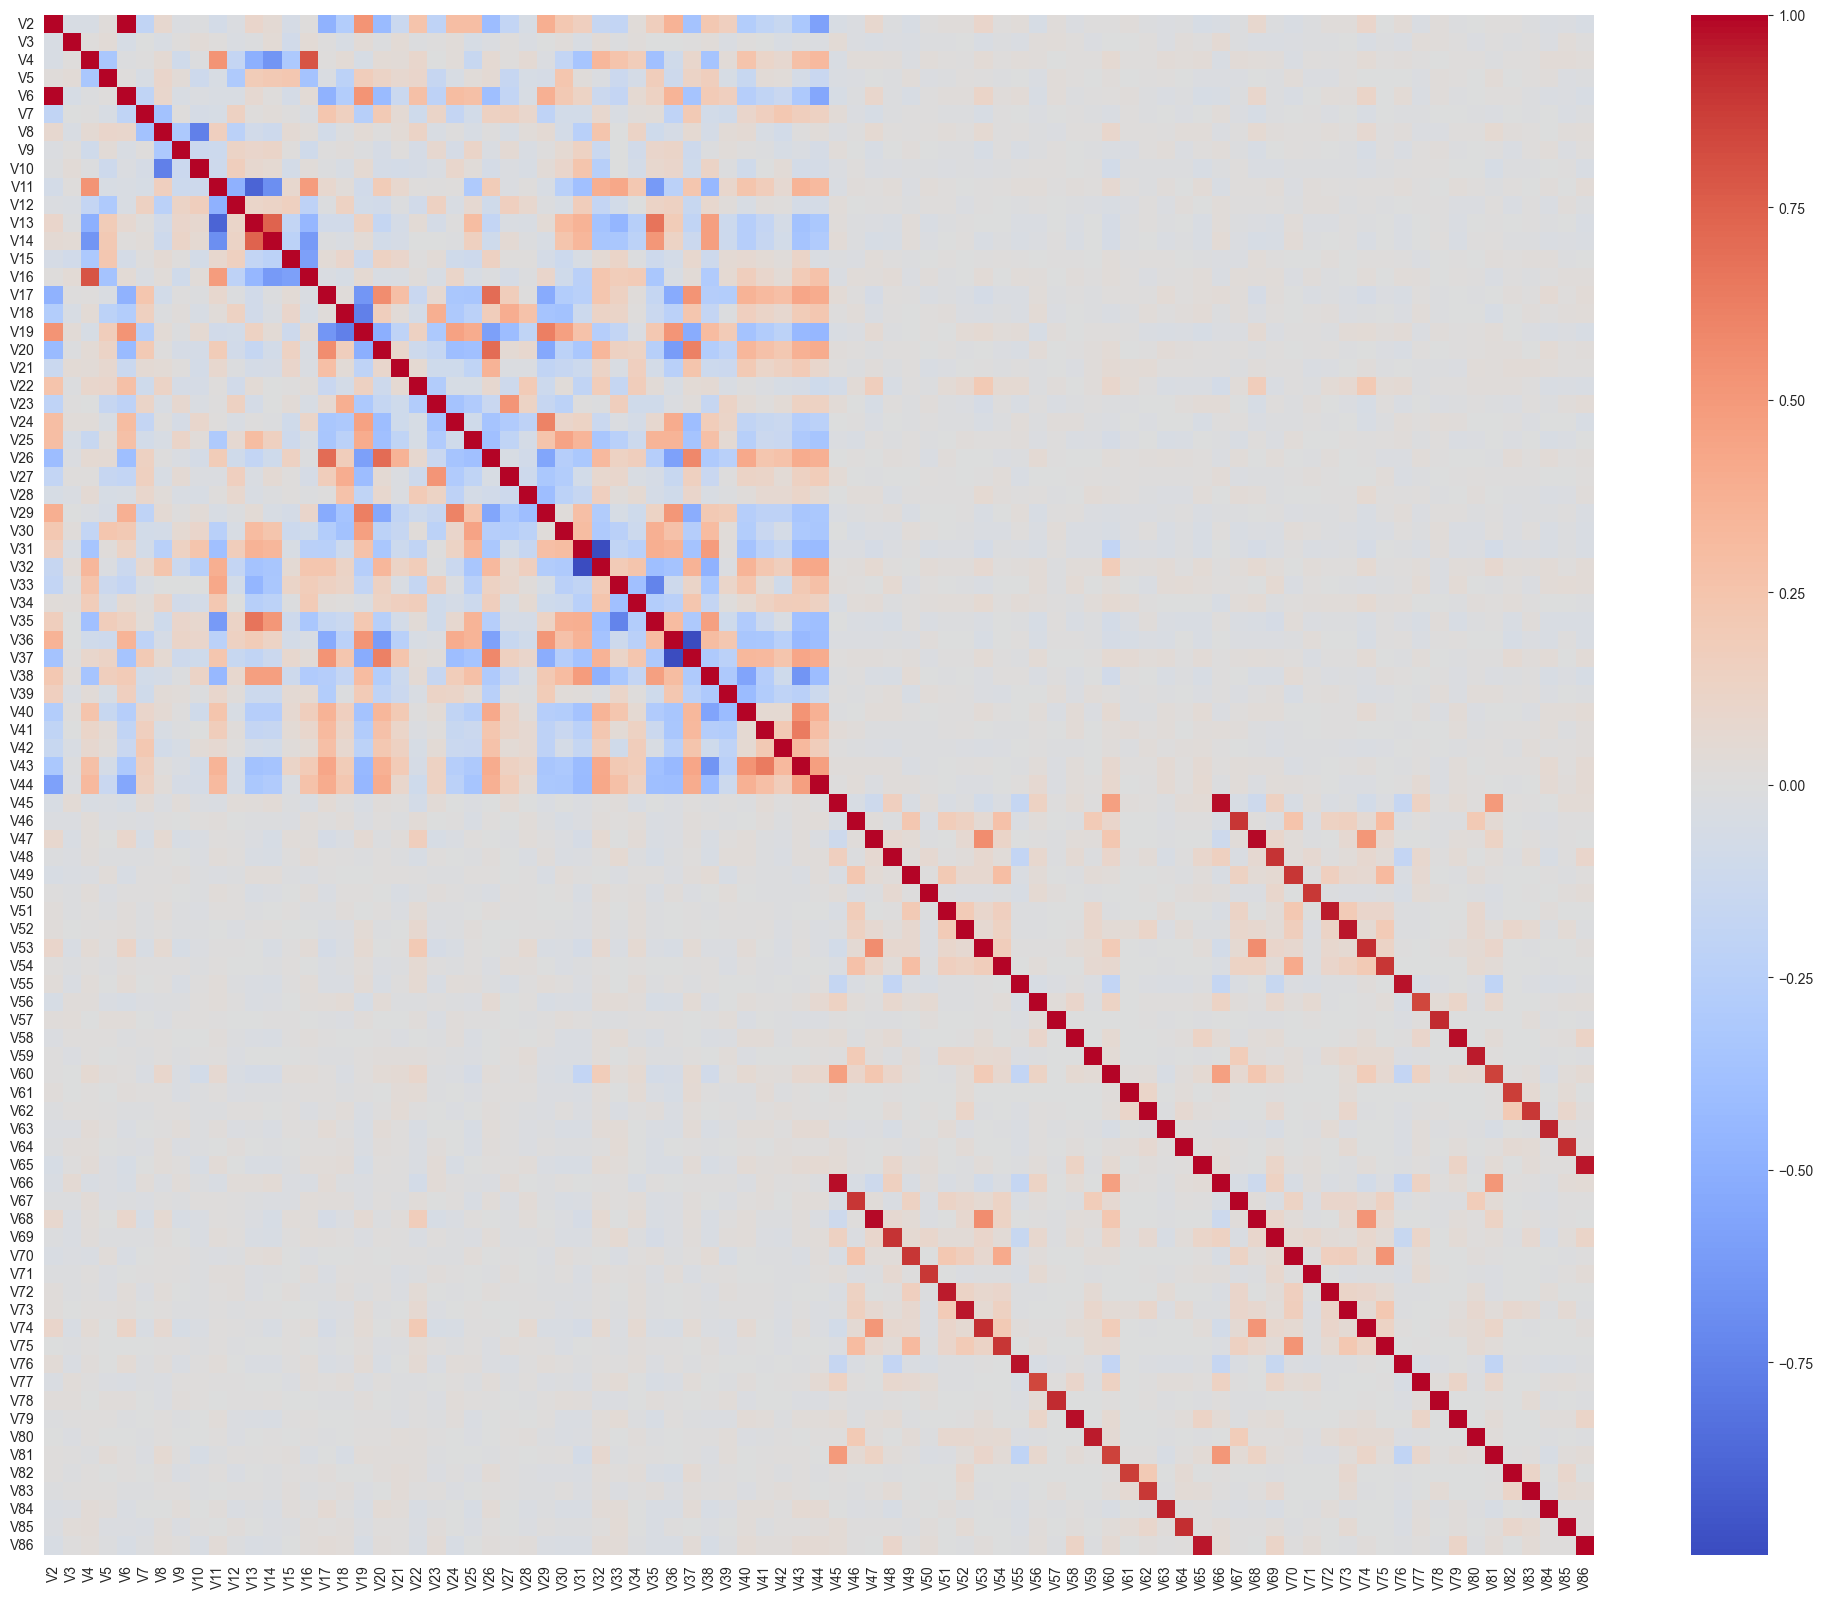

In [39]:
# check the correlation between each column
plt.figure(figsize=(25, 20))
sns.heatmap(df.drop(columns=['Id', 'Buy']).corr(), cmap='coolwarm')
# the columns from V45 to V86 seem to be highly correlated with each other, we can keep only V45
columns_to_drop = ['V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59',
                   'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73',
                   'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86']
df.drop(columns=columns_to_drop, inplace=True)

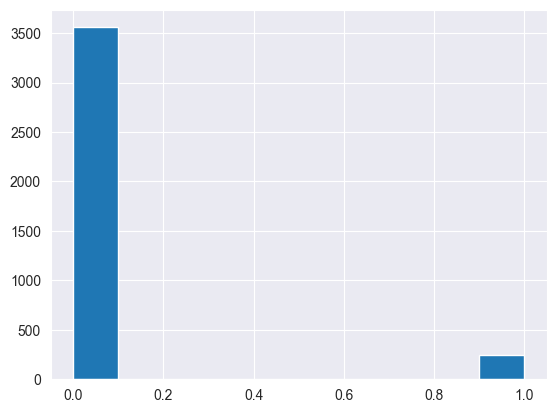

In [40]:
# plot the distribution of the target
df['Buy'].hist()
plt.show()
# the overwhelming majority of the target values are 0, we will have to deal with this imbalance later

## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

In [41]:
# undersample the train data
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df.drop(columns=['Id', 'Buy']), df['Buy'])
X_resampled.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45
0,18,1,1,3,4,0,5,1,4,1,...,4,5,6,2,2,0,0,3,2,2
1,12,1,4,2,3,0,7,2,0,9,...,7,2,0,4,5,0,0,5,7,2
2,38,1,2,3,9,1,5,1,3,5,...,6,3,3,4,2,1,0,4,4,0
3,39,1,2,4,9,0,4,1,5,3,...,7,2,7,2,0,0,0,2,5,0
4,24,1,2,3,5,0,6,0,3,3,...,5,4,3,6,1,0,0,3,2,0


## Building models

- Build a dummy model to have a baseline score

- Build a better model to classify your data and beat your baseline model

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve
--------------------------------









**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve


In [42]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [43]:
def rate_model(classifier_name, classifier, x_train, x_test):
    classifier.fit(x_train, y_train)
    # score the model, accuracy, recall, precision, f1 score
    pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # plot the learning curves for the test and train sets
    train_sizes, train_scores, test_scores = learning_curve(classifier, x_train, y_train, cv=5)

    # Plotting the learning curves
    plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
    plt.plot(train_sizes, test_scores.mean(axis=1), label='test')

    # Adding the text below the graph
    plt.text(
        270,
        train_scores.mean(axis=1)[0],
        f"accuracy={accuracy:.2f}, recall={recall:.2f}, precision={precision:.2f}, f1 score={f1:.2f}",
        ha='right',
        va='top'
    )

    # Setting the title, x-label, y-label, and legend
    plt.title(classifier_name)
    plt.xlabel('train size')
    plt.ylabel('score')
    plt.legend()

    # Displaying the graph
    plt.show()
    return accuracy, recall, precision, f1

## Dummy model

C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

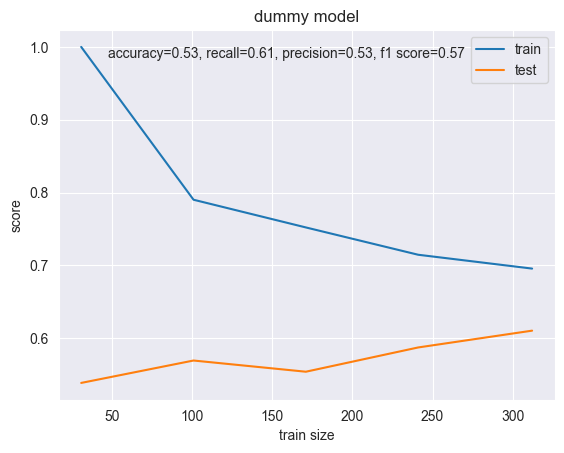

(0.5306122448979592,
 0.6122448979591837,
 0.5263157894736842,
 0.5660377358490565)

In [44]:
# build a simple model (logical regression)
dummy_model = LogisticRegression()
dummy_model.fit(X_train, y_train)
# score the model, accuracy, recall, precision, f1 score
rate_model('dummy model', dummy_model, x_train=X_train, x_test=X_test)

## Improving the model
As seen in visualization, most of the outliers were in the columns that were dropped. A standard scaler should work.

In [45]:
# standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

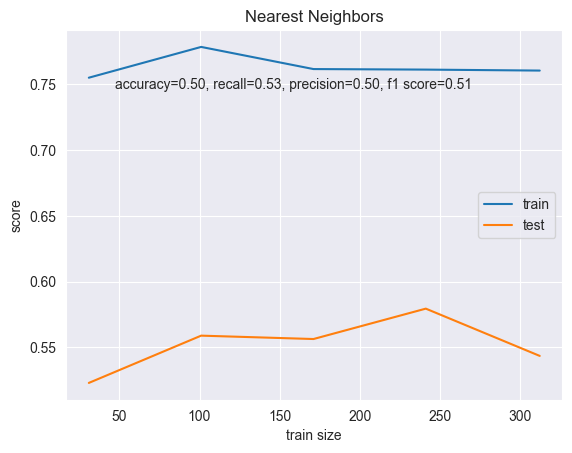

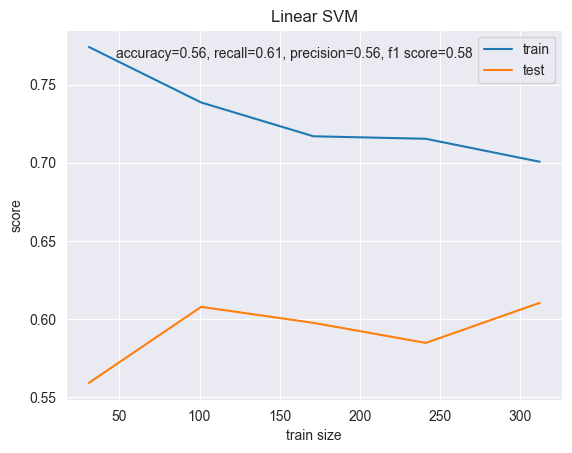

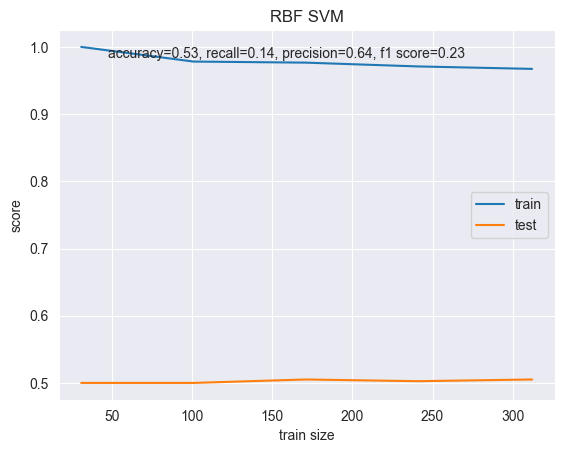

C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


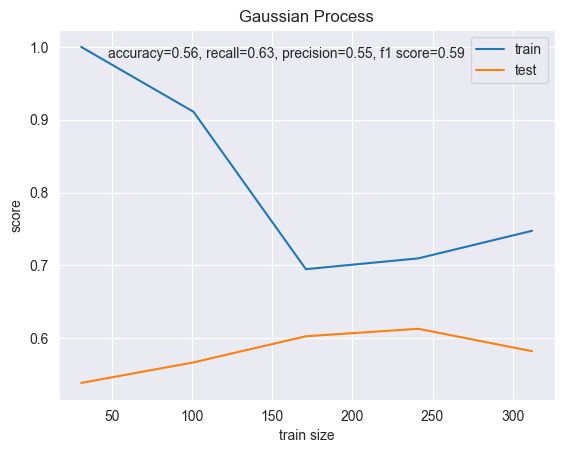

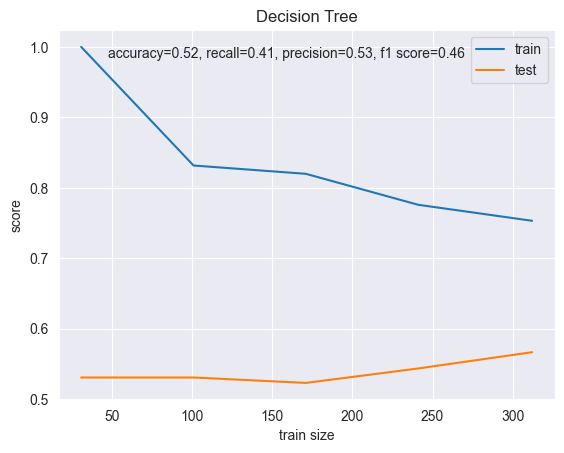

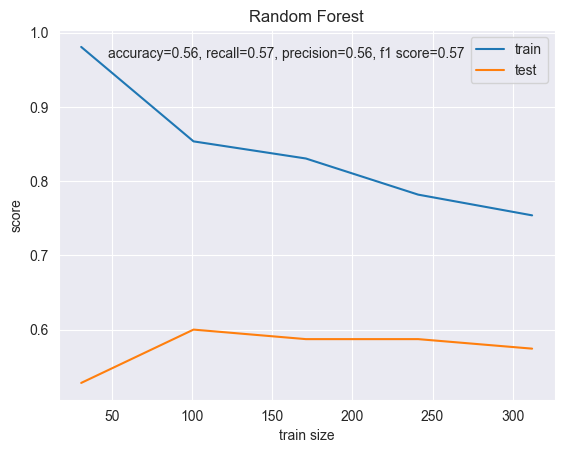

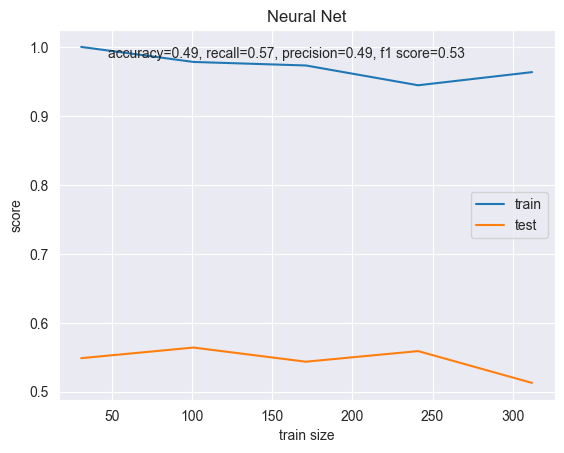

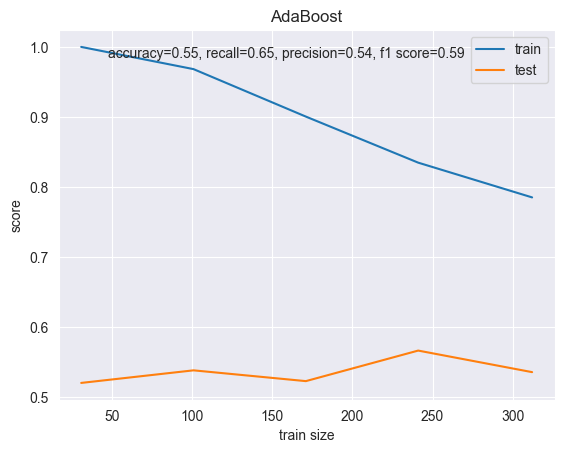

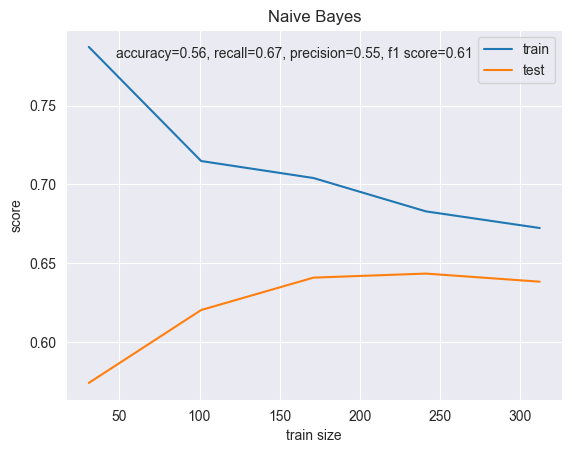

C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are col

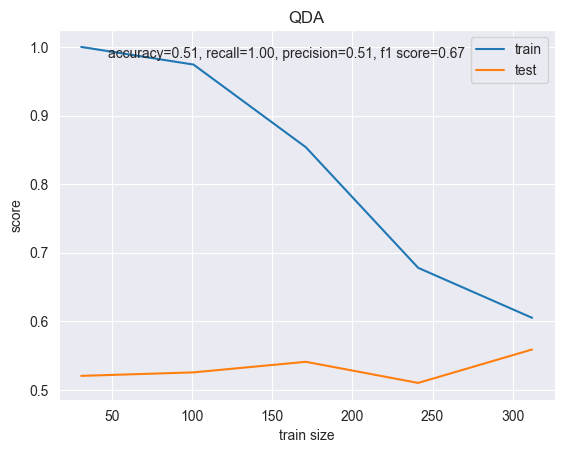

In [46]:
# build a better model (from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
models = {
    'Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Linear SVM': SVC(C=0.025, kernel='linear'),
    'RBF SVM': SVC(C=1, gamma=2),
    'Gaussian Process': GaussianProcessClassifier(kernel=1 ** 2 * RBF(length_scale=1)),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10),
    'Neural Net': MLPClassifier(alpha=1, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis()
}
results = {}
for name, model in models.items():
    results[name] = rate_model(name, model, x_train=X_train_scaled, x_test=X_test_scaled)

In [47]:
# find the one with better f1 score
best_model = max(results, key=lambda k: results[k][3])
print(f"The best model here is *{best_model}*, with a f1 score of {results[best_model][3]:.2f}")

The best model here is *QDA*, with a f1 score of 0.67


## Robust scaler

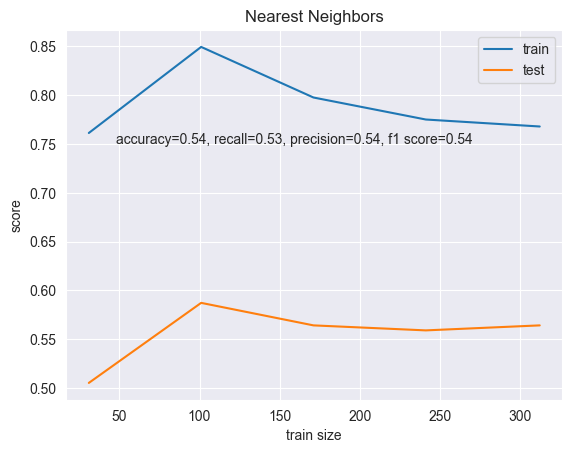

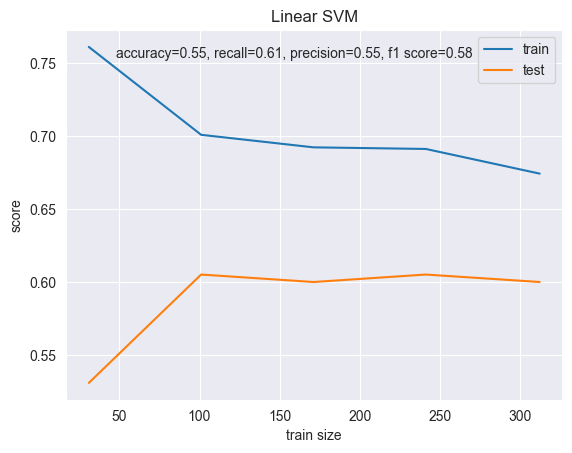

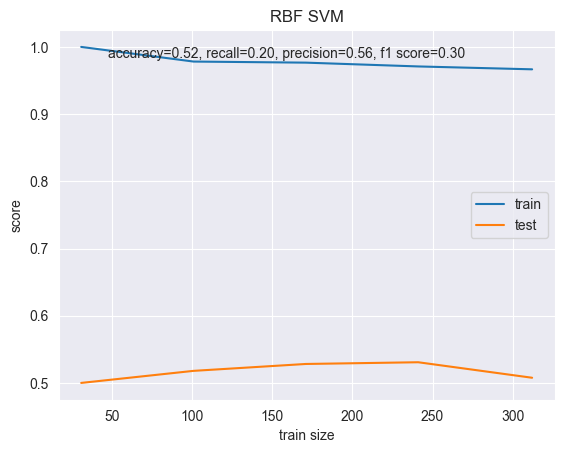

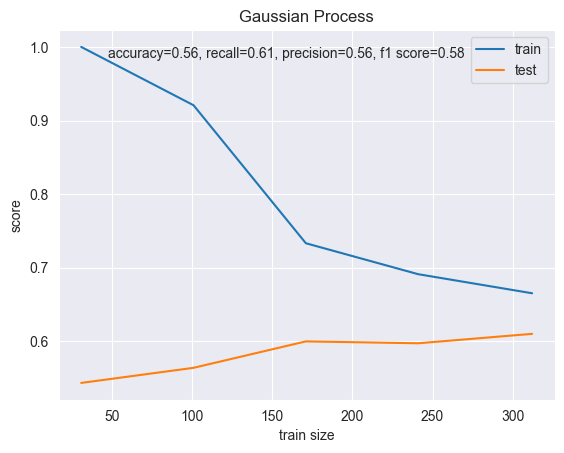

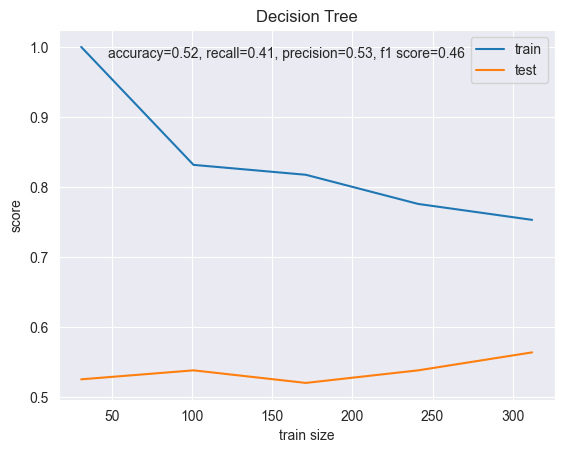

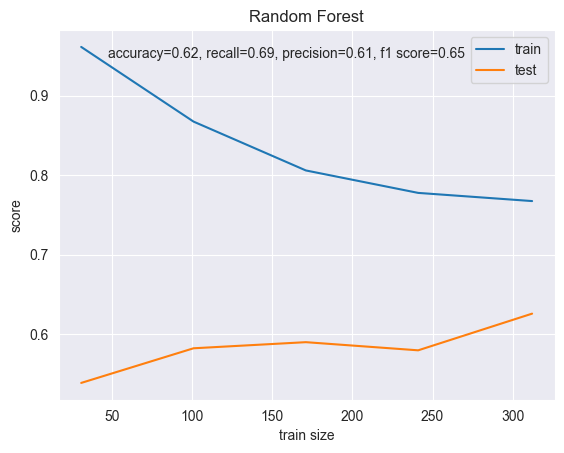

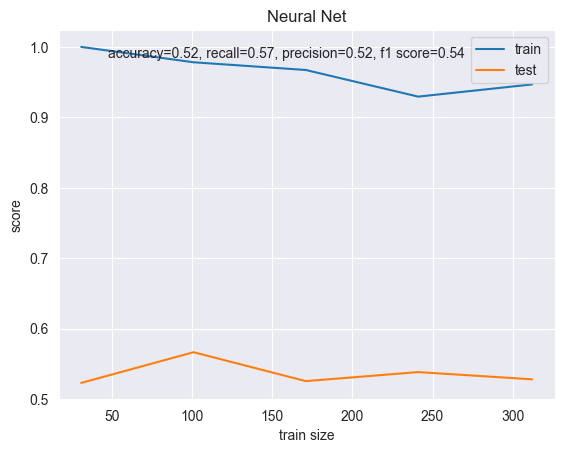

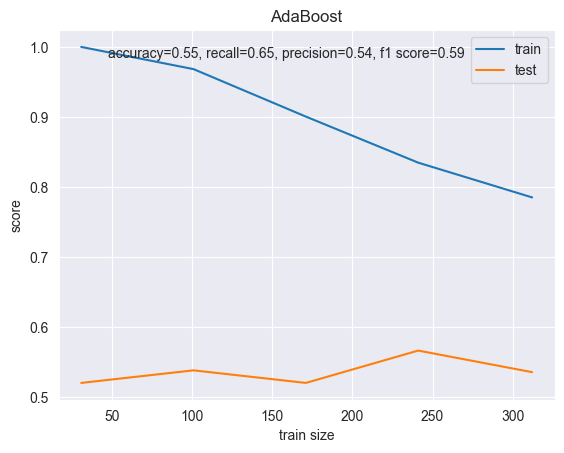

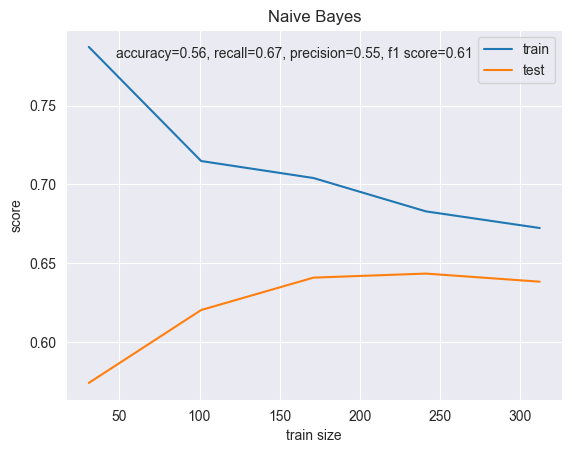

C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\julie\PycharmProjects\ml\venv\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are col

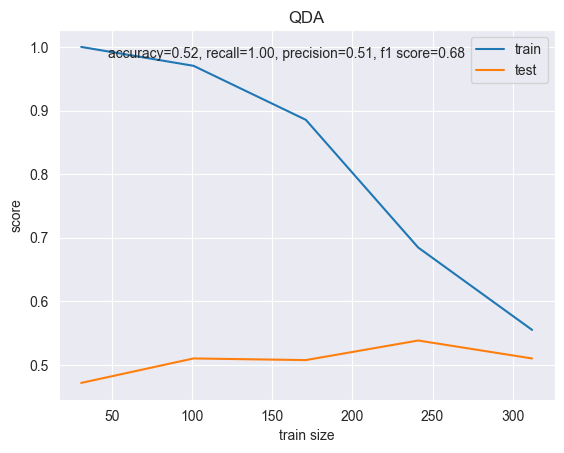

The best model here is *QDA*, with a f1 score of 0.68


In [48]:
# robust scaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# execute each model
for name, model in models.items():
    results[name] = rate_model(name, model, x_train=X_train_scaled, x_test=X_test_scaled)

# find the one with better f1 score
best_model = max(results, key=lambda k: results[k][3])
print(f"The best model here is *{best_model}*, with a f1 score of {results[best_model][3]:.2f}")

We obtain a better score with the robust scaler than the standard scaler.

# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.
